**Step 1 - Import Libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import yfinance as yf
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from  statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot

**Step 2 - Download the data**

In [ ]:
# Define the list of stocks based on public disclosures
stocks = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOGL']

# Download historical stock data for the past 5 years
data = yf.download(stocks, start="2024-01-01", end="2024-12-01")['Adj Close']

# Save to a CSV for future use
data.to_csv("nancy_pelosi_stocks.csv")

[*********************100%***********************]  5 of 5 completed


**Step 3 - Cleanning data**

In [ ]:
# Crate a DataFrame for the downloaded stock price data skipping 2 rows
data_day_raw = pd.read_csv('nancy_pelosi_stocks.csv')
data_day_raw.head()

,Date,AAPL,GOOGL,MSFT,NVDA,TSLA
0,2024-01-02,184.734985,137.670929,368.117249,48.154346,248.419998
1,2024-01-03,183.351761,138.418213,367.849243,47.555515,238.449997
2,2024-01-04,181.023163,135.897354,365.208984,47.984398,237.929993
3,2024-01-05,180.296707,135.239746,365.020447,49.083080,237.490005
4,2024-01-08,184.655365,138.338501,371.908905,52.238186,240.449997


In [ ]:
data_day_raw.head()

,Date,AAPL,GOOGL,MSFT,NVDA,TSLA
0,2024-01-02,184.734985,137.670929,368.117249,48.154346,248.419998
1,2024-01-03,183.351761,138.418213,367.849243,47.555515,238.449997
2,2024-01-04,181.023163,135.897354,365.208984,47.984398,237.929993
3,2024-01-05,180.296707,135.239746,365.020447,49.083080,237.490005
4,2024-01-08,184.655365,138.338501,371.908905,52.238186,240.449997


In [ ]:
# convert date to datetime64
# Convert the 'Date' column to datetime64
data_day_raw['Date'] = pd.to_datetime(data_day_raw['Date'])
data_day_raw.dtypes
df = data_day_raw

In [ ]:
# check if there is a null value in the data (it was no neccesary since it says in the info() method)
print(df.isnull().sum())

Date     0
AAPL     0
GOOGL    0
MSFT     0
NVDA     0
TSLA     0
dtype: int64


**Step 4 - Univariate Analysis**



In [ ]:
# do descriptive analytics for each column

# Describe the 'AAPL' column
print("Descriptive analytics for APPLE column")
print(df['AAPL'].describe())
print("-----------------------------------------------------------")
# Describe the 'MSFT' column
print("Descriptive analytics for MICROSOFT column")
print(df['MSFT'].describe())
print("-----------------------------------------------------------")
# Describe the 'NVDA' column
print("Descriptive analytics for NVIDIA column")
print(df['NVDA'].describe())
print("-----------------------------------------------------------")
# Describe the 'GOOGL' column
print("Descriptive analytics for GOOGLE column")
print(df['GOOGL'].describe())
print("-----------------------------------------------------------")
# Describe the 'TSLA' column
print("Descriptive analytics for TESLA column")
print(df['TSLA'].describe())



Descriptive analytics for APPLE column
count    231.000000
mean     202.901638
std       23.211019
min      164.405121
25%      182.359299
50%      208.598785
75%      225.651741
max      237.330002
Name: AAPL, dtype: float64
-----------------------------------------------------------
Descriptive analytics for MICROSOFT column
count    231.000000
mean     416.866960
std       17.632709
min      365.020447
25%      406.897354
50%      415.957397
75%      425.638519
max      465.786438
Name: MSFT, dtype: float64
-----------------------------------------------------------
Descriptive analytics for NVIDIA column
count    231.000000
mean     105.136031
std       26.558254
min       47.555515
25%       86.699986
50%      109.193138
75%      126.410477
max      148.869751
Name: NVDA, dtype: float64
-----------------------------------------------------------
Descriptive analytics for GOOGLE column
count    231.000000
mean     161.293773
std       14.115161
min      130.925369
25%      150.2752

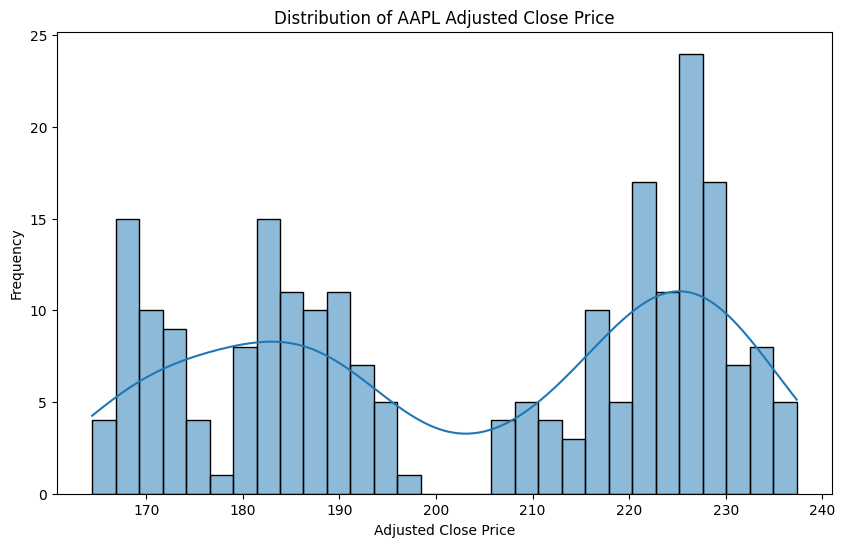

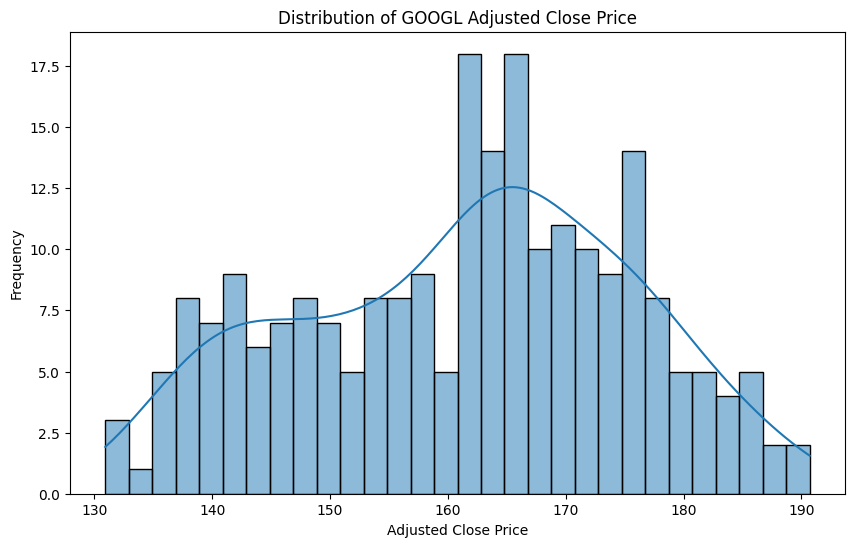

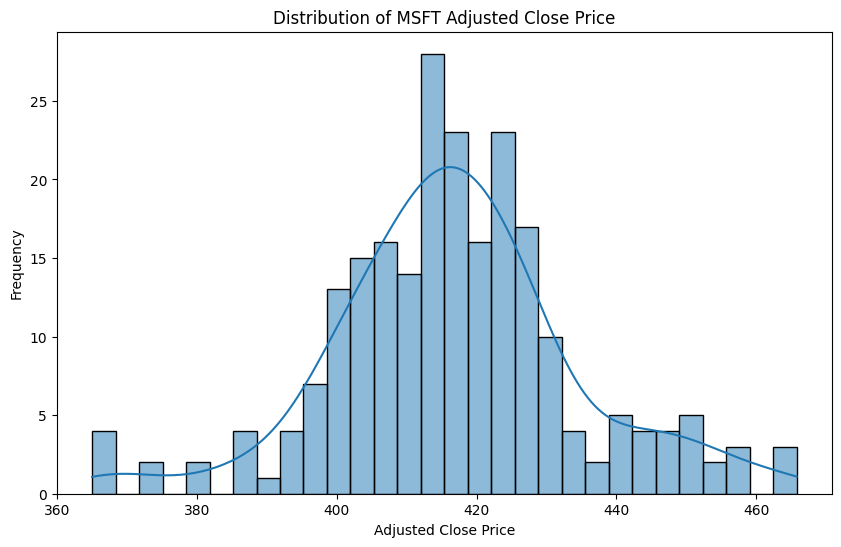

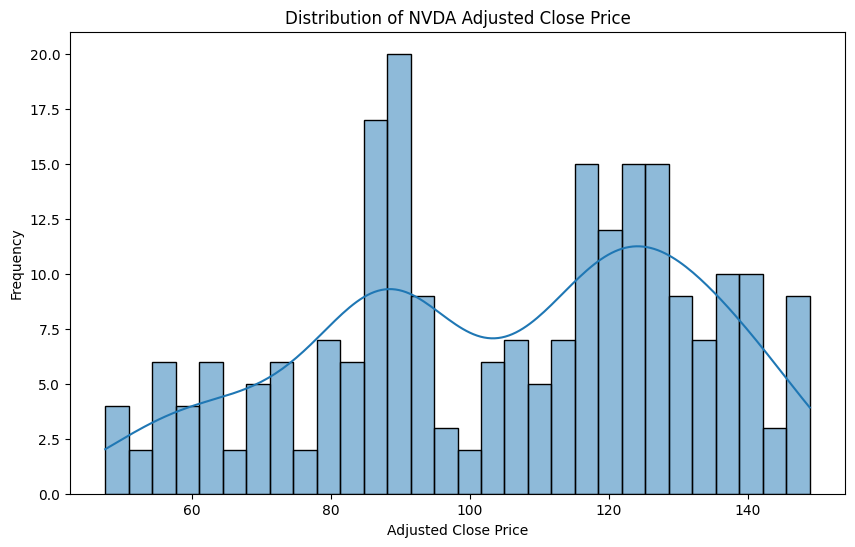

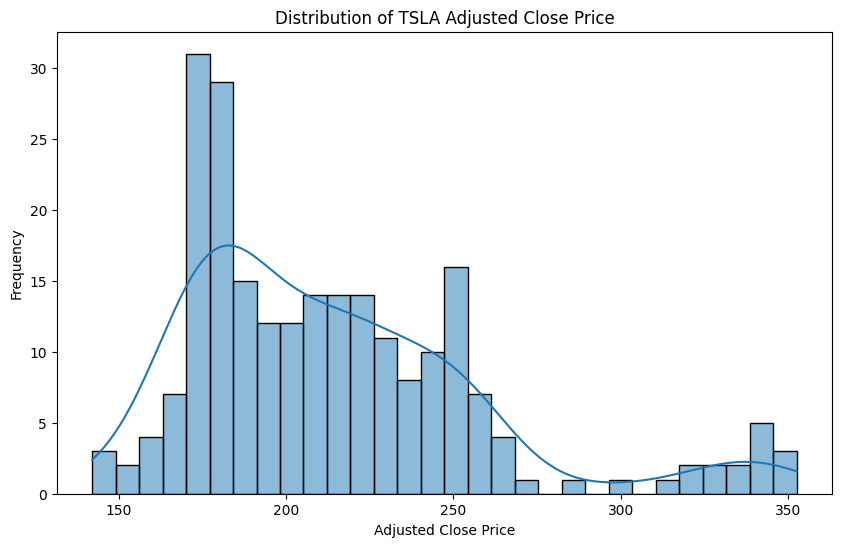

In [ ]:
# Distribution of stocks close price
plt.figure(figsize=(10, 6))
sns.histplot(df['AAPL'], kde=True, bins=30)
plt.title('Distribution of AAPL Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['GOOGL'], kde=True, bins=30)
plt.title('Distribution of GOOGL Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MSFT'], kde=True, bins=30)
plt.title('Distribution of MSFT Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['NVDA'], kde=True, bins=30)
plt.title('Distribution of NVDA Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['TSLA'], kde=True, bins=30)
plt.title('Distribution of TSLA Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()


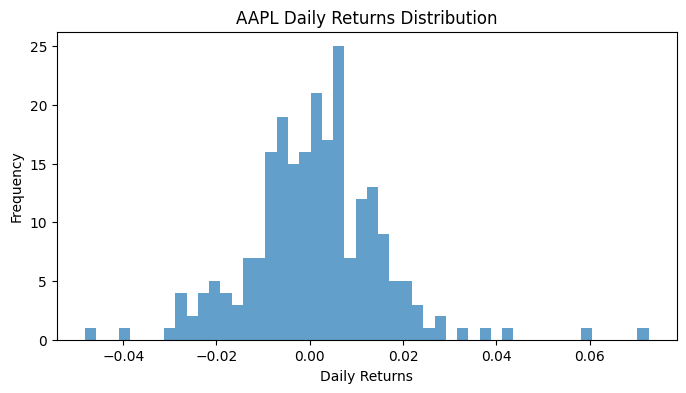

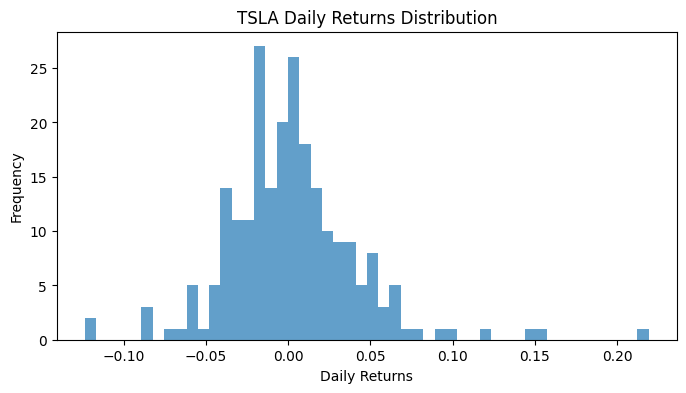

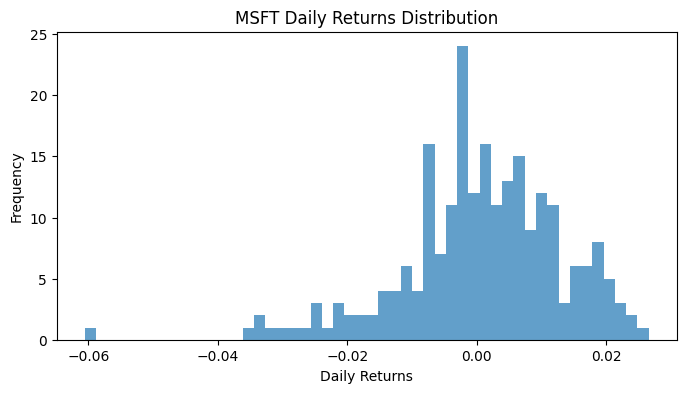

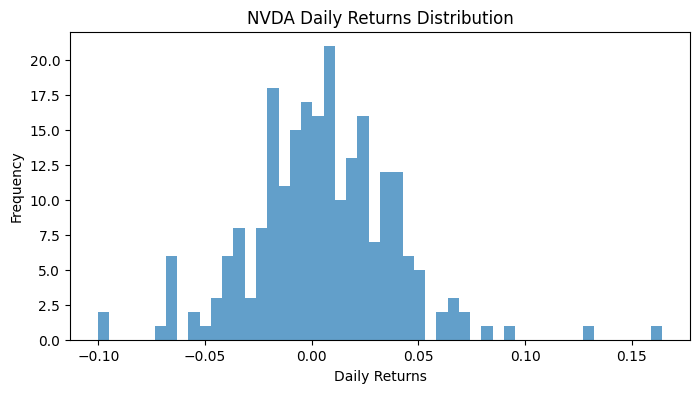

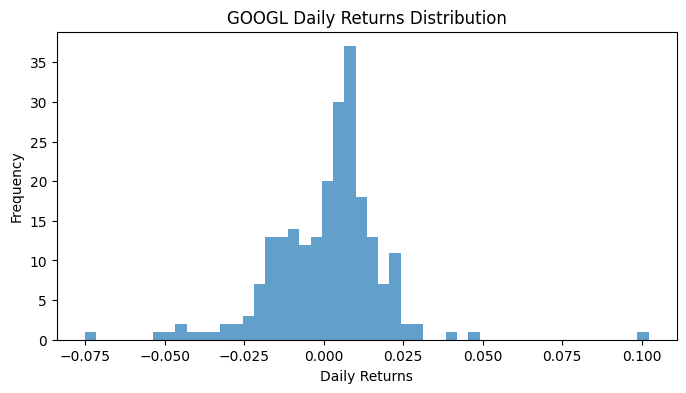

In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Descriptive statistics
stats = returns.describe()

# Plot histogram of returns for each stock
for stock in stocks:
    plt.figure(figsize=(8, 4))
    plt.hist(returns[stock], bins=50, alpha=0.7)
    plt.title(f'{stock} Daily Returns Distribution')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.show()

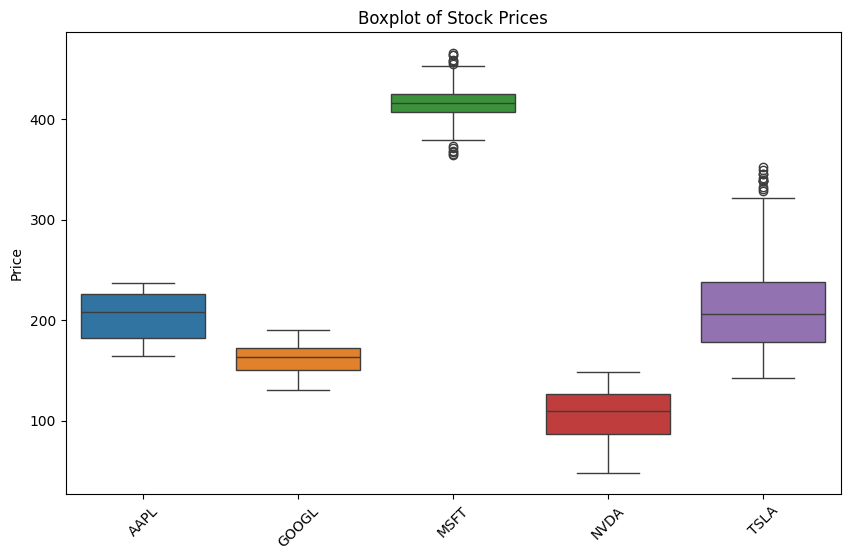

In [ ]:
# code to do a boxplot of all columns on df

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=returns)
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

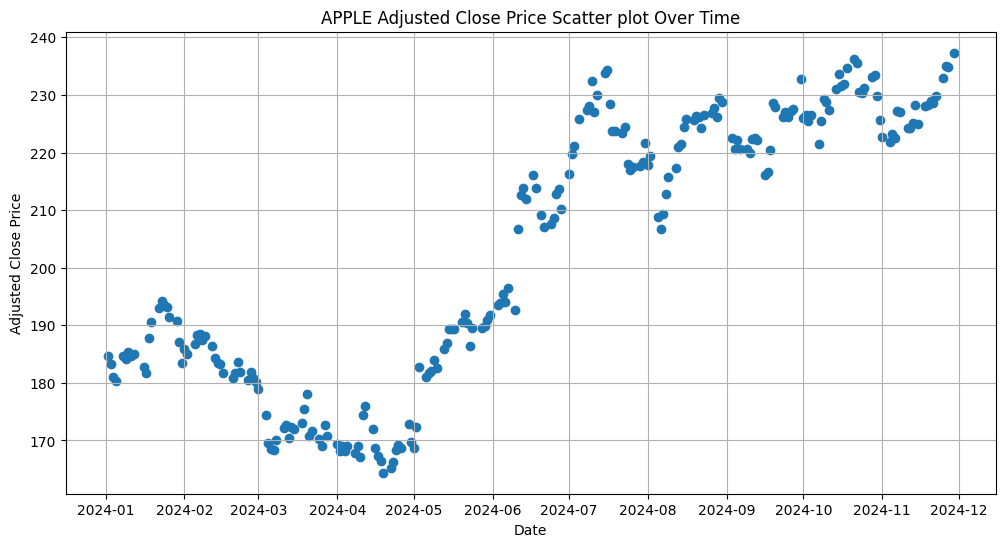

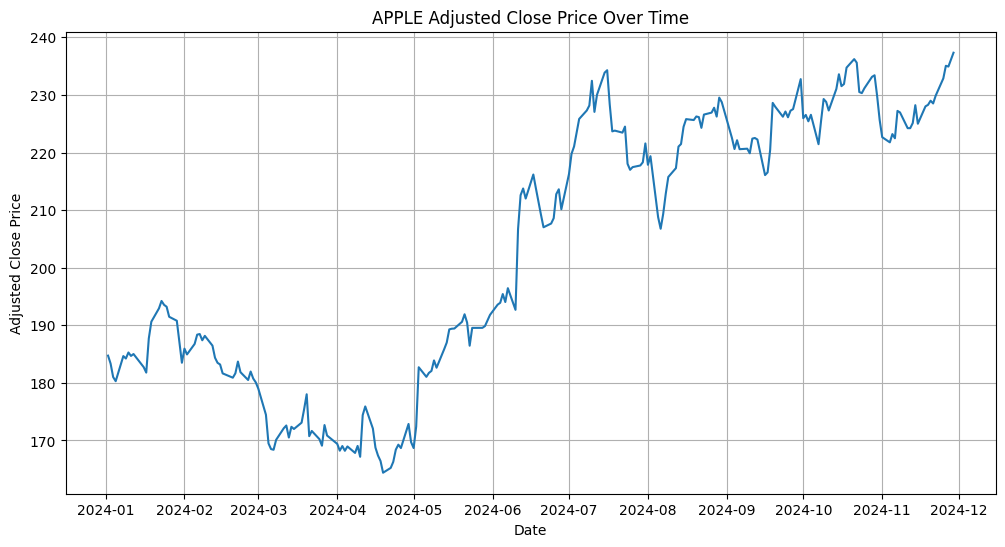

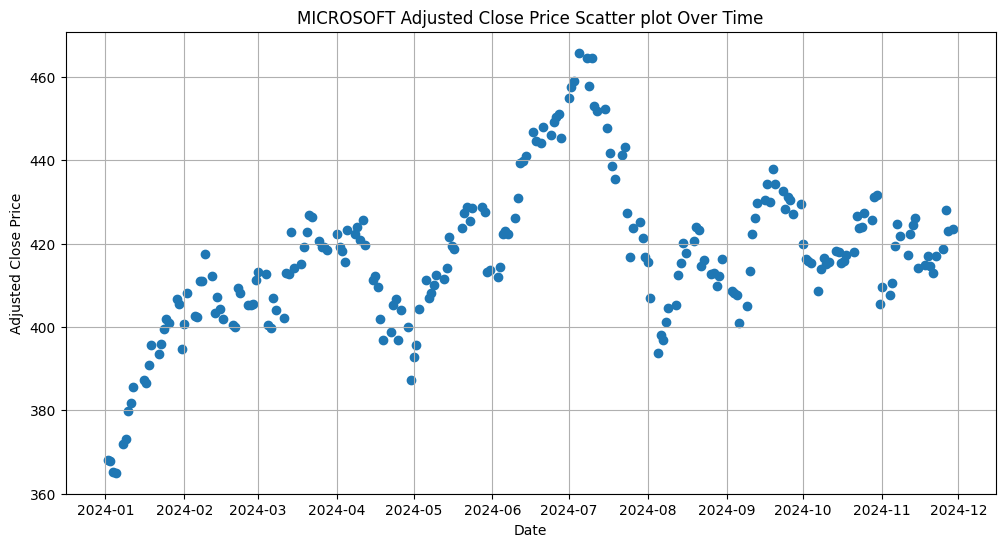

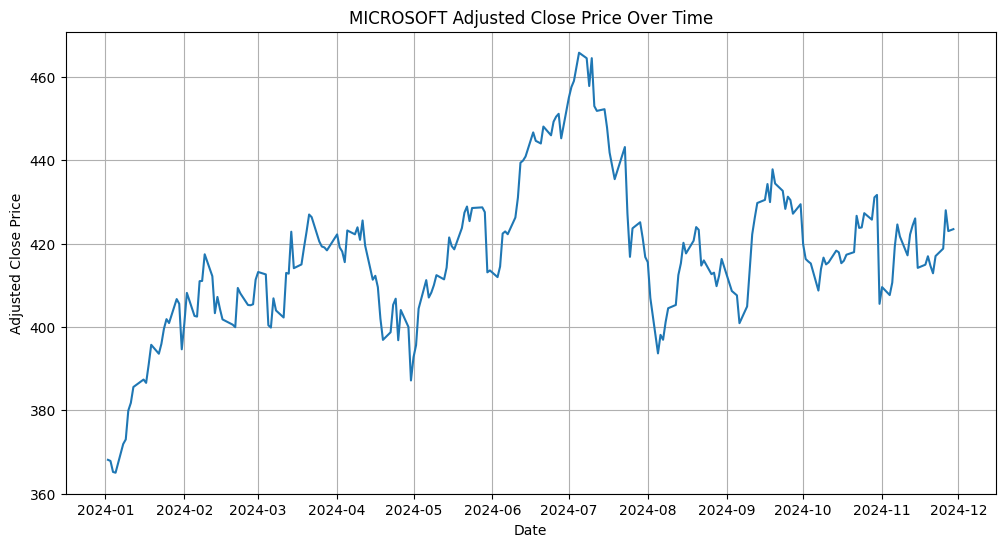

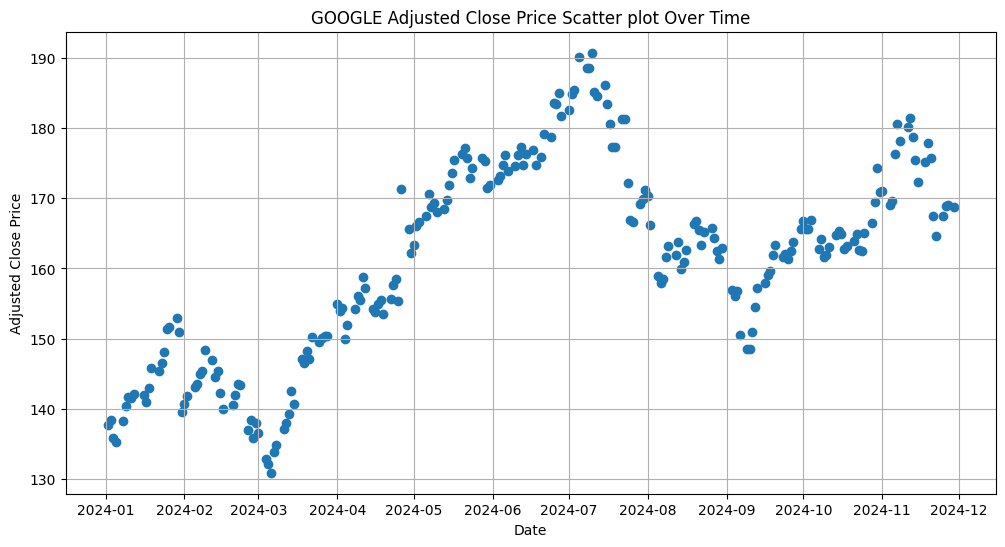

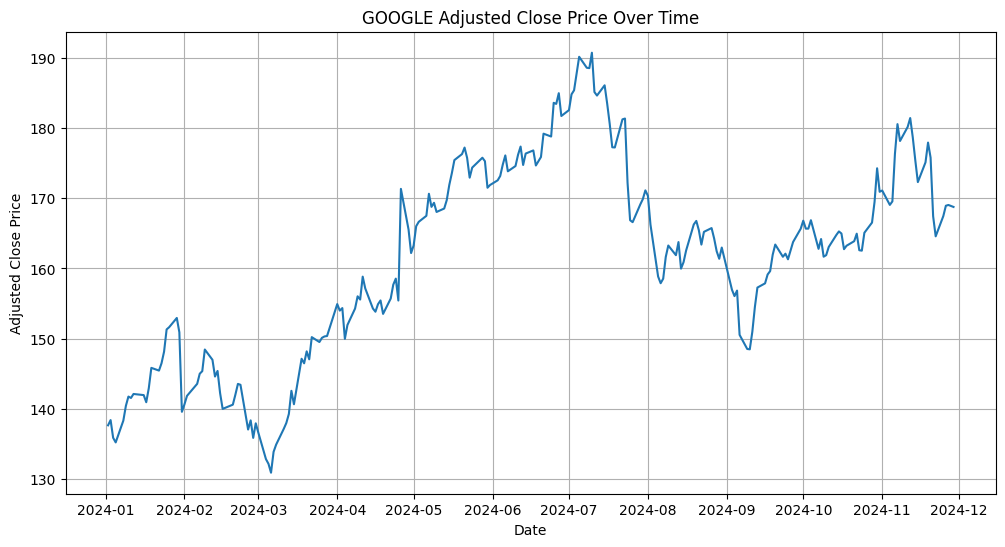

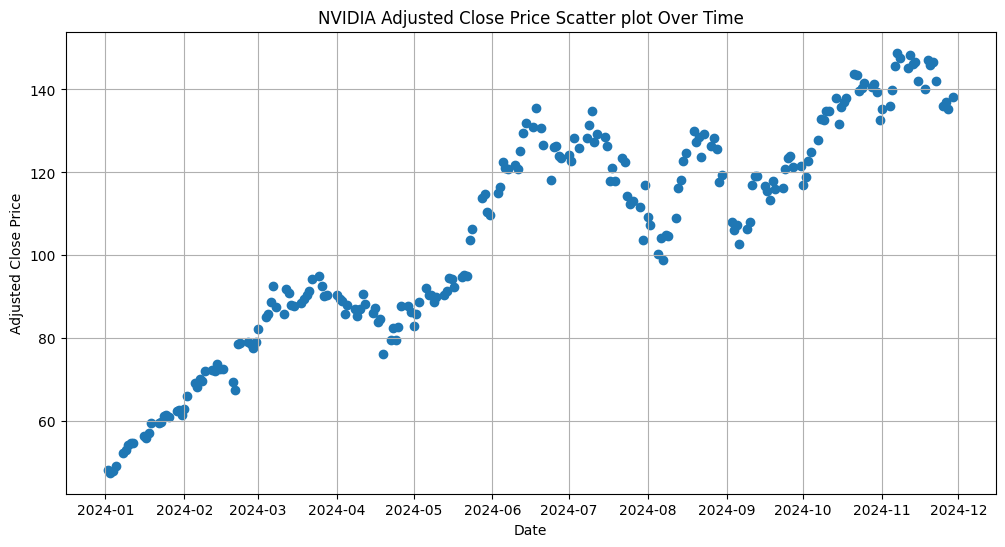

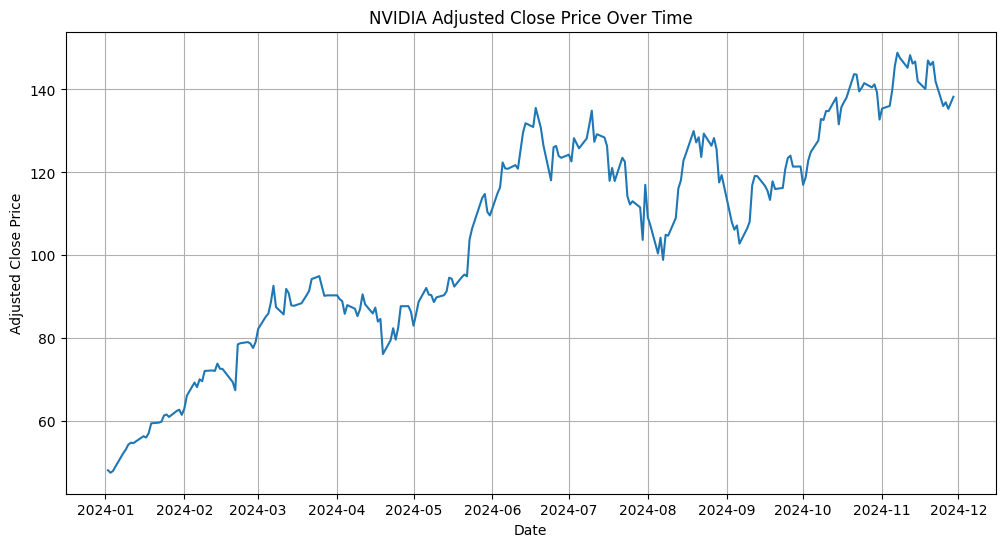

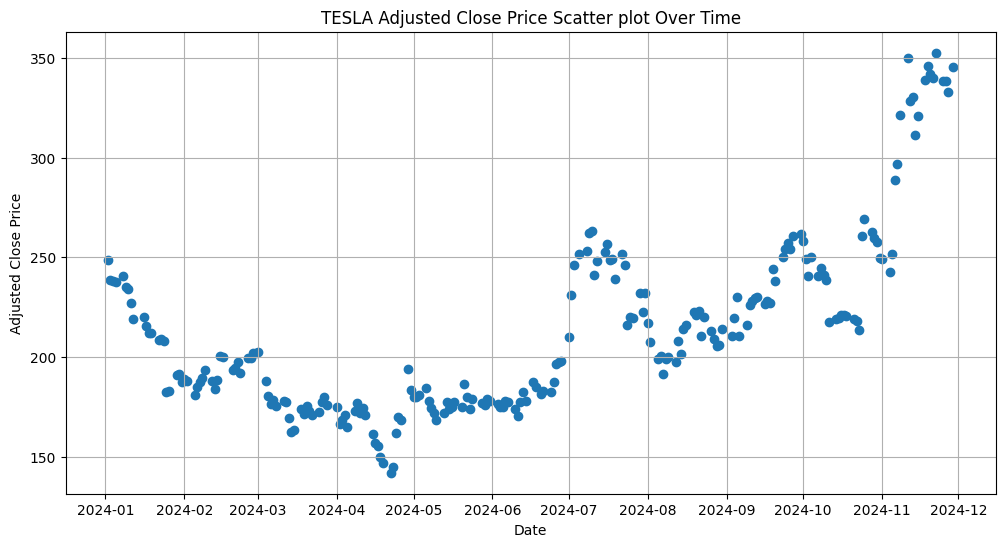

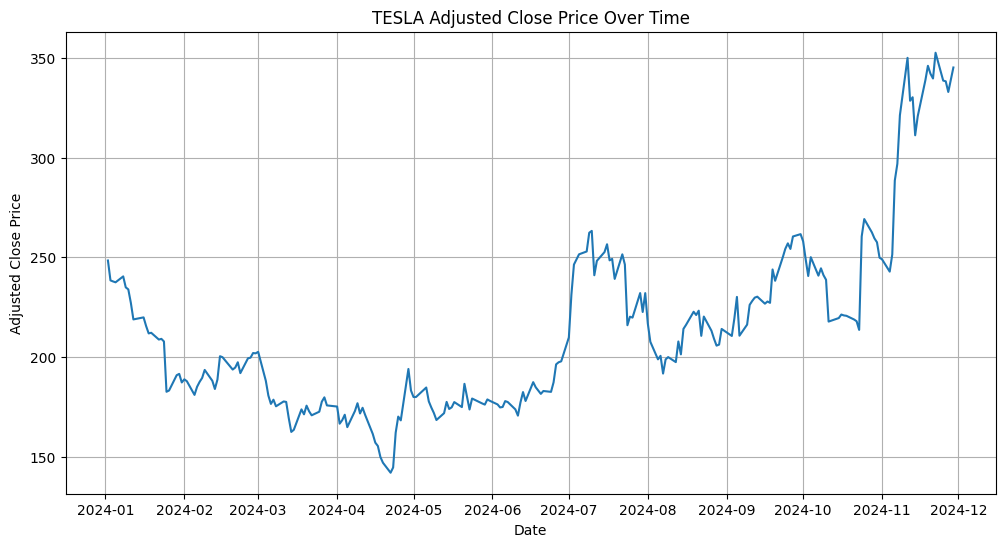

In [ ]:
# create a scatter plot of the AAPL adjusted_close
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['AAPL'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('APPLE Adjusted Close Price Scatter plot Over Time')
plt.grid(True)
plt.show()

# create a time series plot of the AAPL adjusted_close
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AAPL'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('APPLE Adjusted Close Price Over Time')
plt.grid(True)
plt.show()

# create a scatter plot of the MSFT adjusted_close
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['MSFT'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('MICROSOFT Adjusted Close Price Scatter plot Over Time')
plt.grid(True)
plt.show()

# create a time series plot of the MSFT adjusted_close
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MSFT'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('MICROSOFT Adjusted Close Price Over Time')
plt.grid(True)
plt.show()

# create a scatter plot of the GOOGL adjusted_close
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['GOOGL'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('GOOGLE Adjusted Close Price Scatter plot Over Time')
plt.grid(True)
plt.show()

# create a time series plot of the GOOGL adjusted_close
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['GOOGL'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('GOOGLE Adjusted Close Price Over Time')
plt.grid(True)
plt.show()

# create a scatter plot of the NVDA adjusted_close
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['NVDA'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('NVIDIA Adjusted Close Price Scatter plot Over Time')
plt.grid(True)
plt.show()

# create a time series plot of the NVDA adjusted_close
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['NVDA'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('NVIDIA Adjusted Close Price Over Time')
plt.grid(True)
plt.show()

# create a scatter plot of the TSLA adjusted_close
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['TSLA'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('TESLA Adjusted Close Price Scatter plot Over Time')
plt.grid(True)
plt.show()

# create a time series plot of the TSLA adjusted_close
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['TSLA'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('TESLA Adjusted Close Price Over Time')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

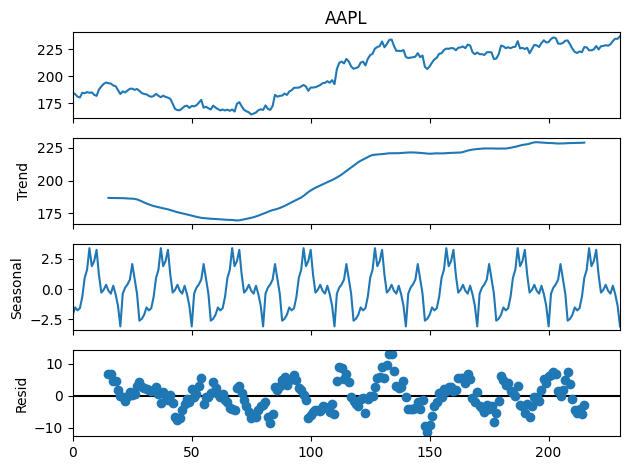

<Figure size 1200x800 with 0 Axes>

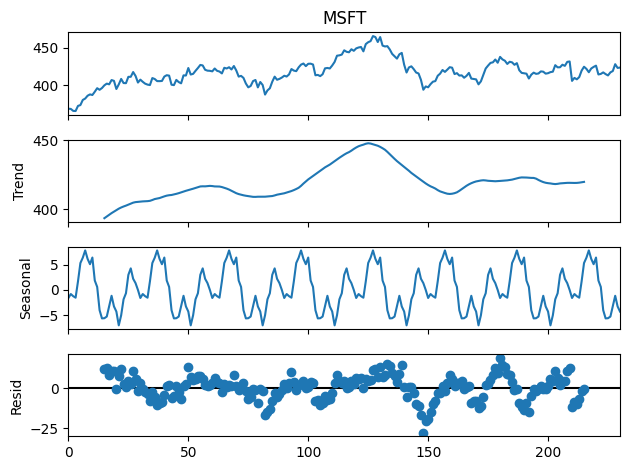

<Figure size 1200x800 with 0 Axes>

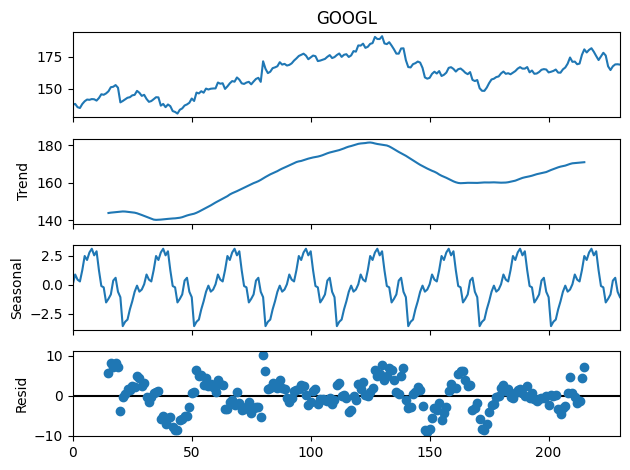

<Figure size 1200x800 with 0 Axes>

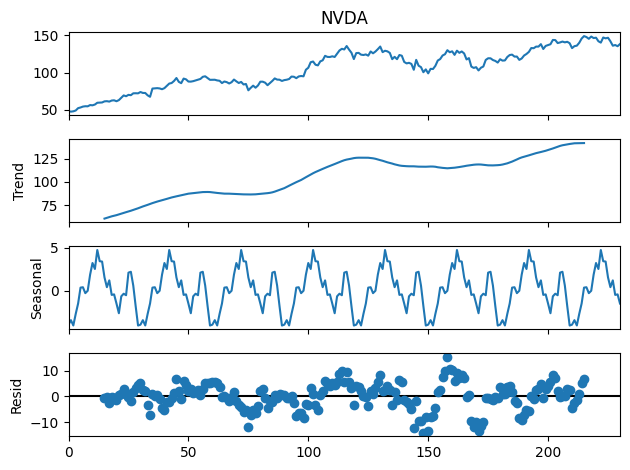

<Figure size 1200x800 with 0 Axes>

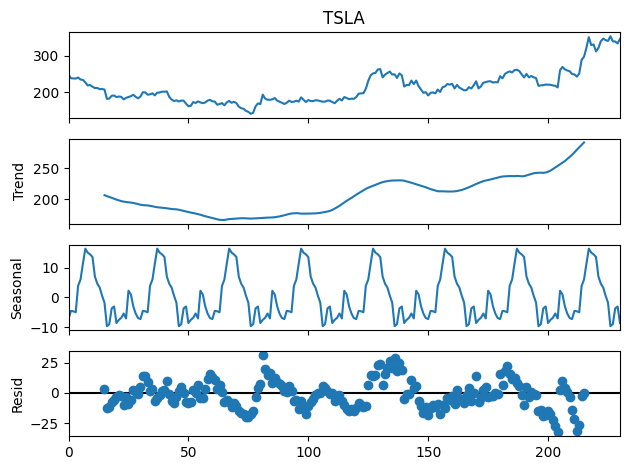

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(df['AAPL'], model='additive', period=30)

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['MSFT'], model='additive', period=30)

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['GOOGL'], model='additive', period=30)

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['NVDA'], model='additive', period=30)

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['TSLA'], model='additive', period=30)

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()



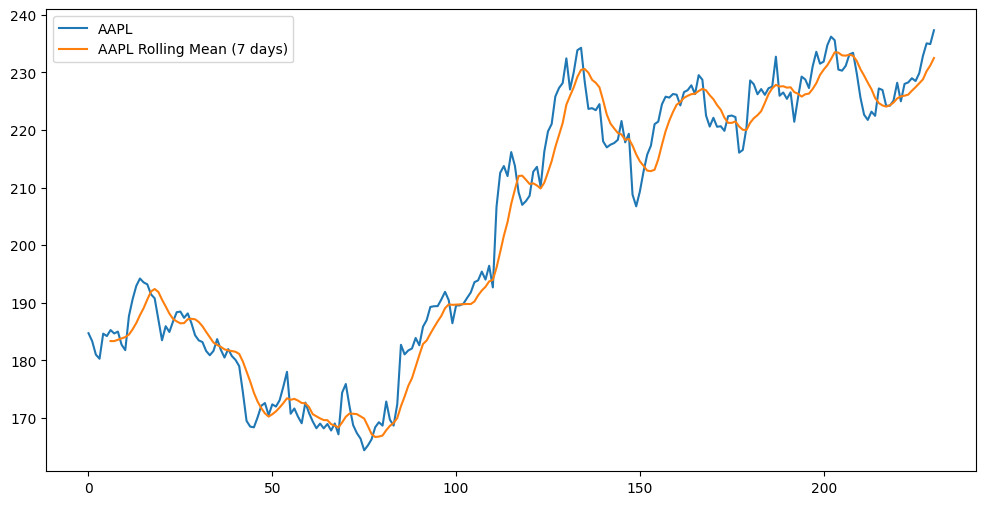

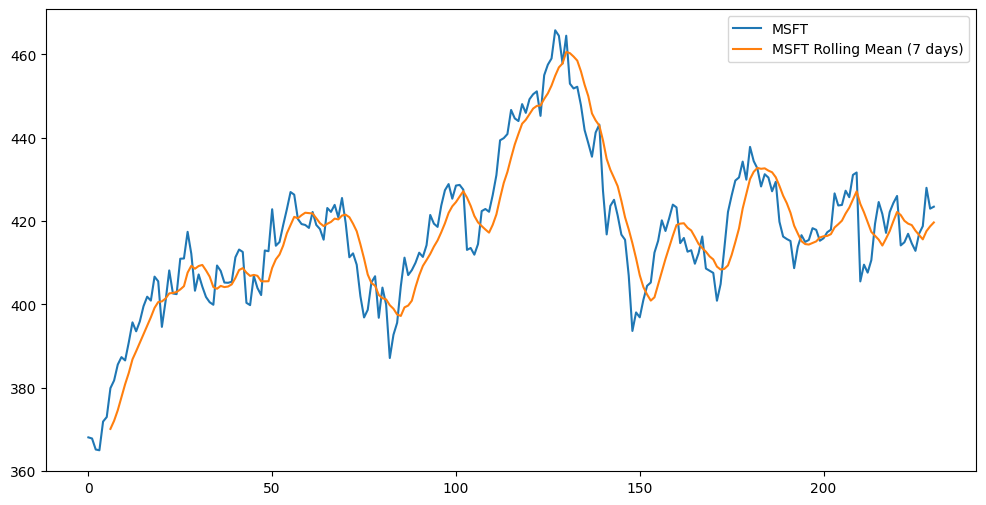

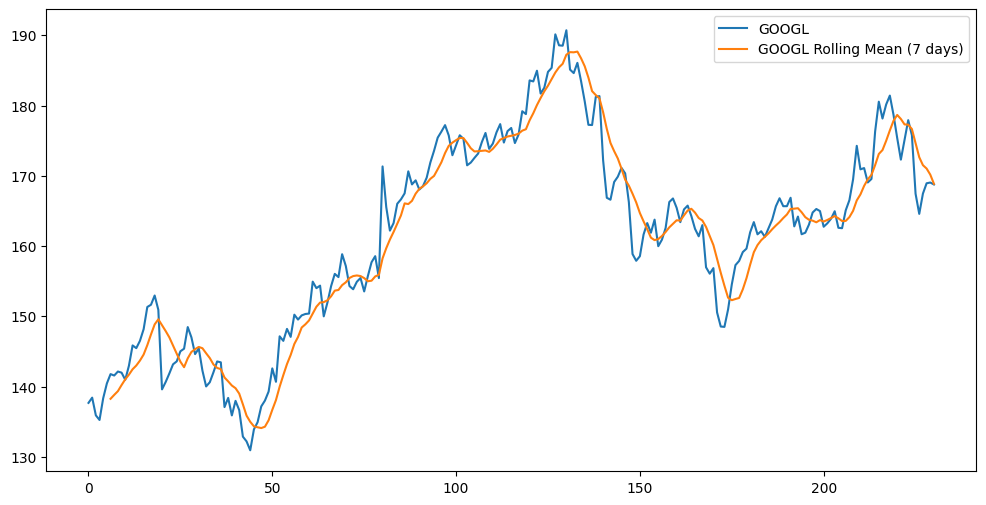

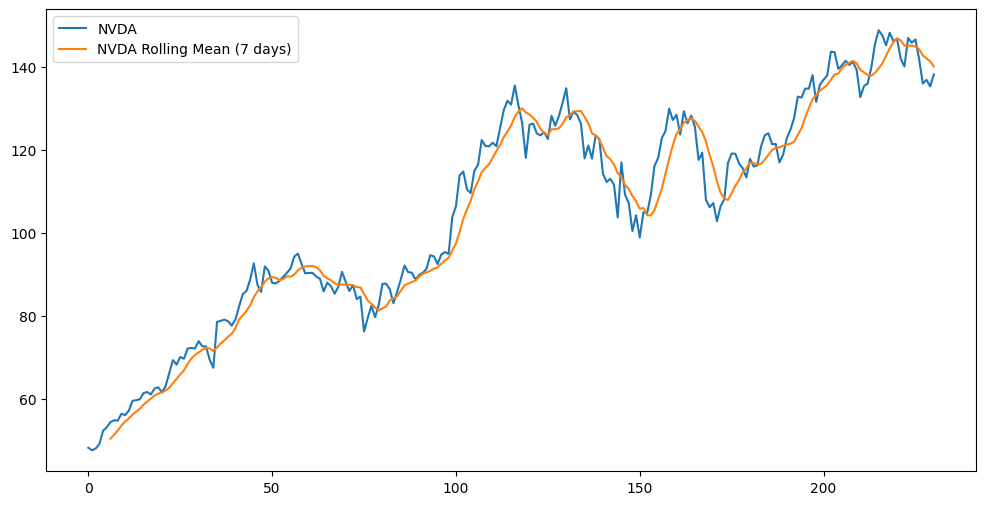

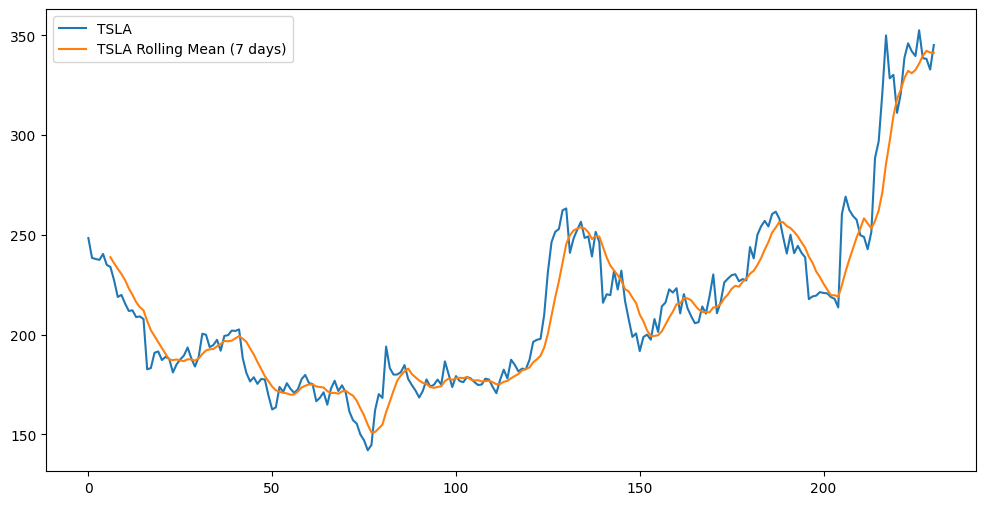

In [ ]:
# loop to do the rolling mean time series for each column

df1 = df.copy()
for column in df1.columns:
  if column != 'Date':  # Skip the 'Date' column
    # Calculate the rolling mean with a window of 7
    df1[f'{column}_rolling_mean'] = df[column].rolling(window=7).mean()


# Example plotting:

plt.figure(figsize=(12,6))
plt.plot(df1['AAPL'], label='AAPL')
plt.plot(df1['AAPL_rolling_mean'], label='AAPL Rolling Mean (7 days)')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df1['MSFT'], label='MSFT')
plt.plot(df1['MSFT_rolling_mean'], label='MSFT Rolling Mean (7 days)')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df1['GOOGL'], label='GOOGL')
plt.plot(df1['GOOGL_rolling_mean'], label='GOOGL Rolling Mean (7 days)')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df1['NVDA'], label='NVDA')
plt.plot(df1['NVDA_rolling_mean'], label='NVDA Rolling Mean (7 days)')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df1['TSLA'], label='TSLA')
plt.plot(df1['TSLA_rolling_mean'], label='TSLA Rolling Mean (7 days)')
plt.legend()
plt.show()

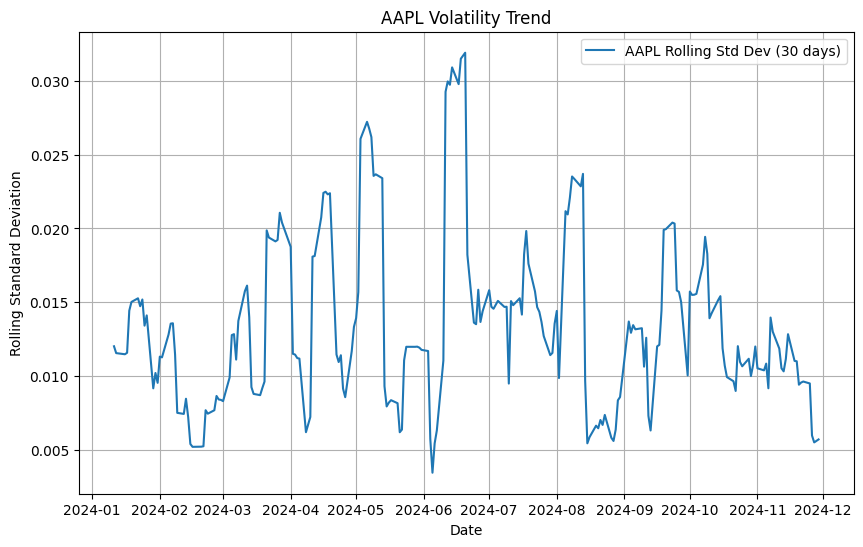

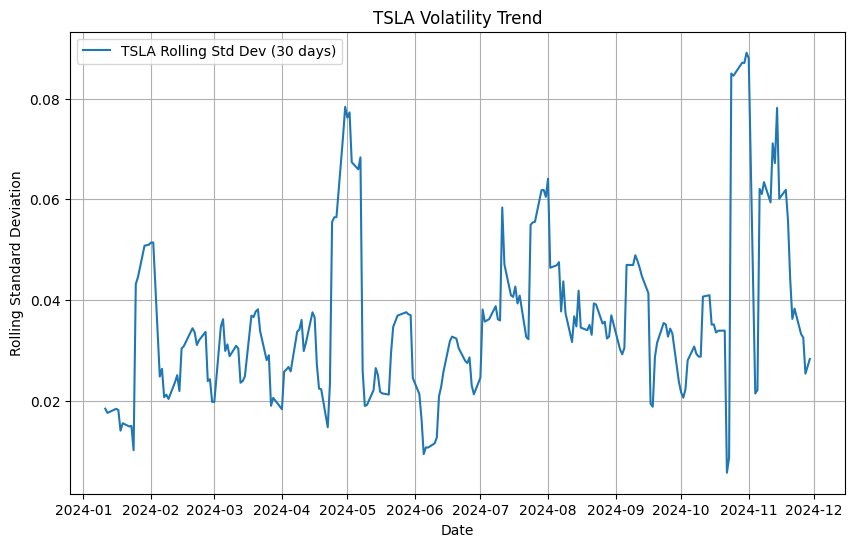

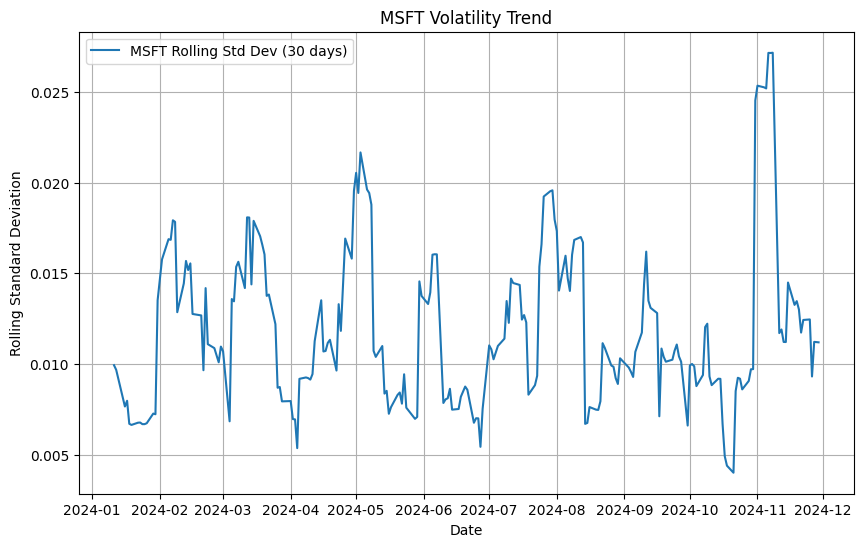

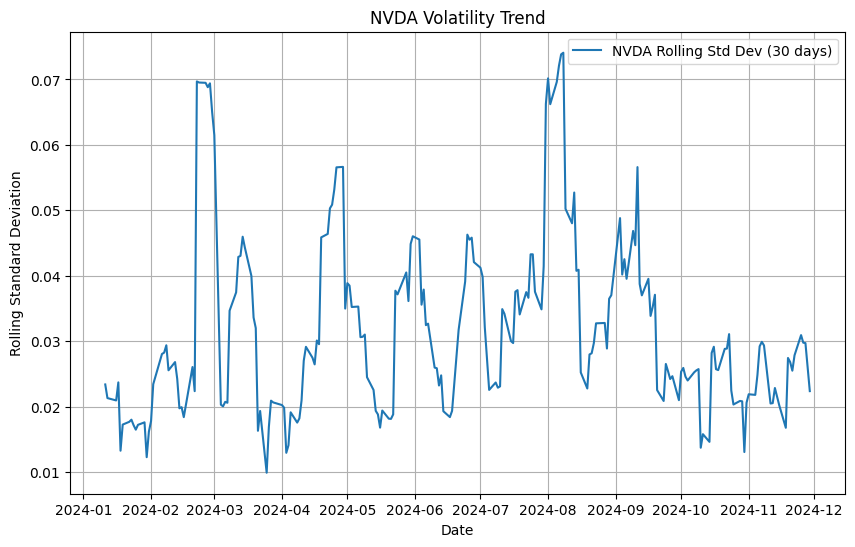

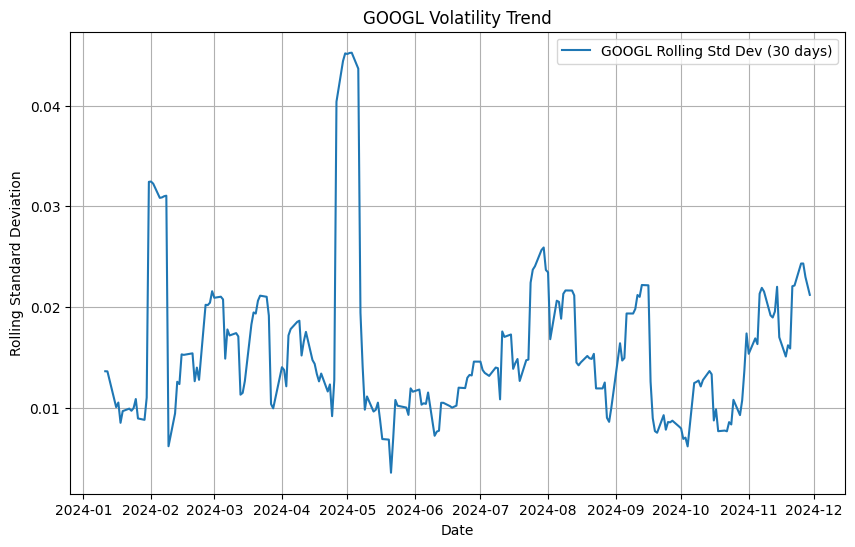

In [ ]:
# codecline plots showing the rolling standard deviation of returns to examine volatility trends.
# Calculate rolling standard deviation
rolling_std = returns.rolling(window=7).std()

# Plot rolling standard deviation for each stock
for stock in stocks:
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_std[stock], label=f'{stock} Rolling Std Dev (30 days)')
    plt.title(f'{stock} Volatility Trend')
    plt.xlabel('Date')
    plt.ylabel('Rolling Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# delete the rolling means columns
# Delete the rolling mean columns
columns_to_delete = [col for col in df1.columns if 'rolling_mean' in col]
df1 = df1.drop(columns=columns_to_delete)

# Verify the columns have been deleted
print(df1.columns)

Index(['Date', 'AAPL', 'GOOGL', 'MSFT', 'NVDA', 'TSLA'], dtype='object')


In [ ]:
df1.dropna()

,Date,AAPL,GOOGL,MSFT,NVDA,TSLA
0,2024-01-02,184.734985,137.670929,368.117249,48.154346,248.419998
1,2024-01-03,183.351761,138.418213,367.849243,47.555515,238.449997
2,2024-01-04,181.023163,135.897354,365.208984,47.984398,237.929993
3,2024-01-05,180.296707,135.239746,365.020447,49.083080,237.490005
4,2024-01-08,184.655365,138.338501,371.908905,52.238186,240.449997
...,...,...,...,...,...,...
226,2024-11-22,229.869995,164.571381,417.000000,141.940216,352.559998
227,2024-11-25,232.869995,167.458069,418.790009,136.010635,338.589996
228,2024-11-26,235.059998,168.926392,427.989990,136.910568,338.230011
229,2024-11-27,234.929993,169.036270,422.989990,135.330673,332.890015


In [ ]:
# calculate adf test with a loop on each column with, just take p value
for col in df1.columns:
    if col != 'Date':
        result = adfuller(df1[col])
        print(f'ADF Statistic for {col}: {result[1]}')

ADF Statistic for AAPL: 0.8870363021004577
ADF Statistic for GOOGL: 0.3250625450491113
ADF Statistic for MSFT: 0.023155588780539478
ADF Statistic for NVDA: 0.37067716153508784
ADF Statistic for TSLA: 0.9419241596454422


In [ ]:
df2 = df1.copy()

# Calculate daily returns for each stock and add them as new columns
for stock in stocks:
    df2[f'{stock}_returns'] = df2[stock].pct_change()

print(df2.head())

        Date        AAPL       GOOGL        MSFT       NVDA        TSLA  \
0 2024-01-02  184.734985  137.670929  368.117249  48.154346  248.419998   
1 2024-01-03  183.351761  138.418213  367.849243  47.555515  238.449997   
2 2024-01-04  181.023163  135.897354  365.208984  47.984398  237.929993   
3 2024-01-05  180.296707  135.239746  365.020447  49.083080  237.490005   
4 2024-01-08  184.655365  138.338501  371.908905  52.238186  240.449997   

   AAPL_returns  TSLA_returns  MSFT_returns  NVDA_returns  GOOGL_returns  
0           NaN           NaN           NaN           NaN            NaN  
1     -0.007488     -0.040134     -0.000728     -0.012436       0.005428  
2     -0.012700     -0.002181     -0.007178      0.009019      -0.018212  
3     -0.004013     -0.001849     -0.000516      0.022897      -0.004839  
4      0.024175      0.012464      0.018871      0.064281       0.022913  


**Step 5 - Bivariate Analysis**

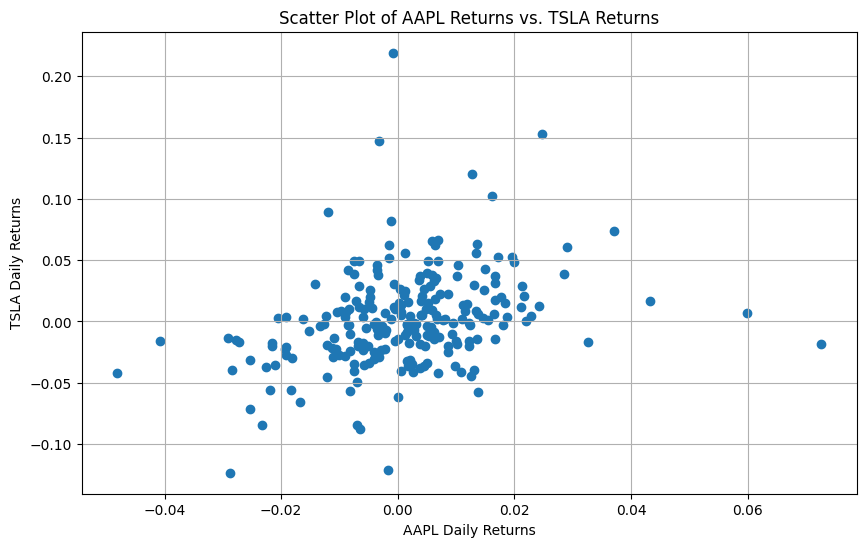

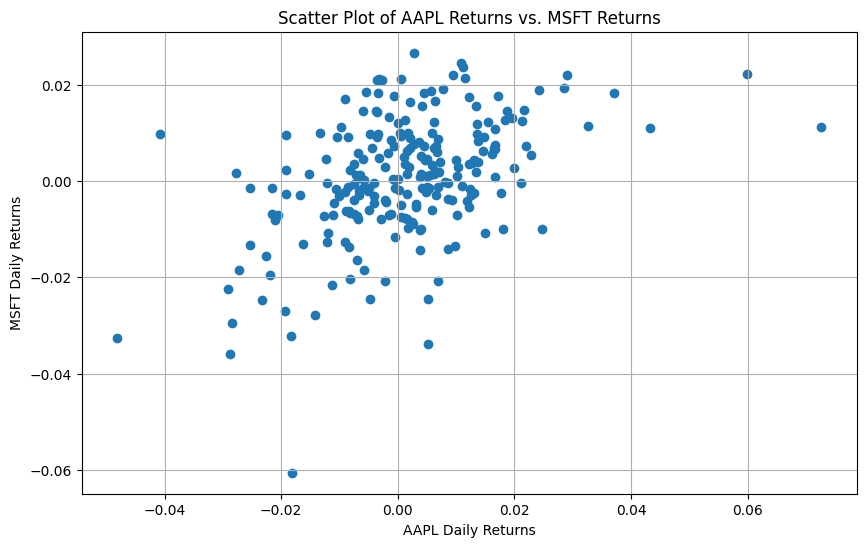

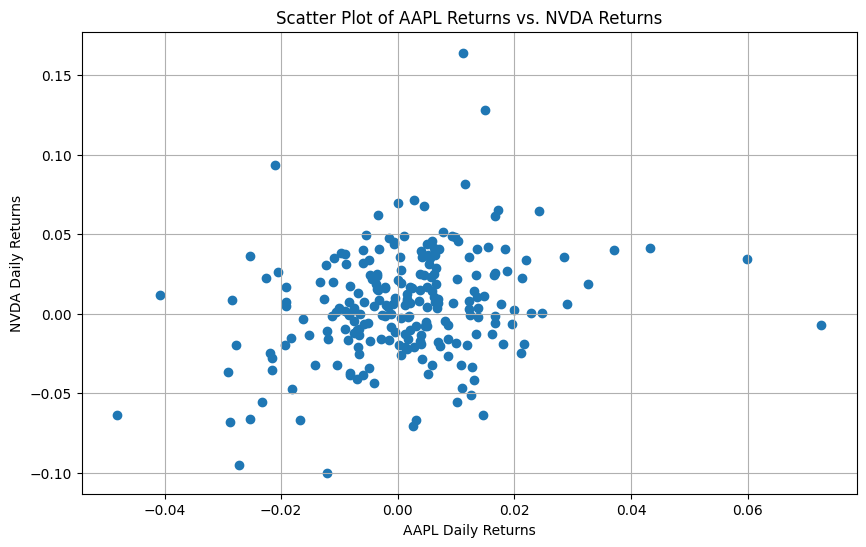

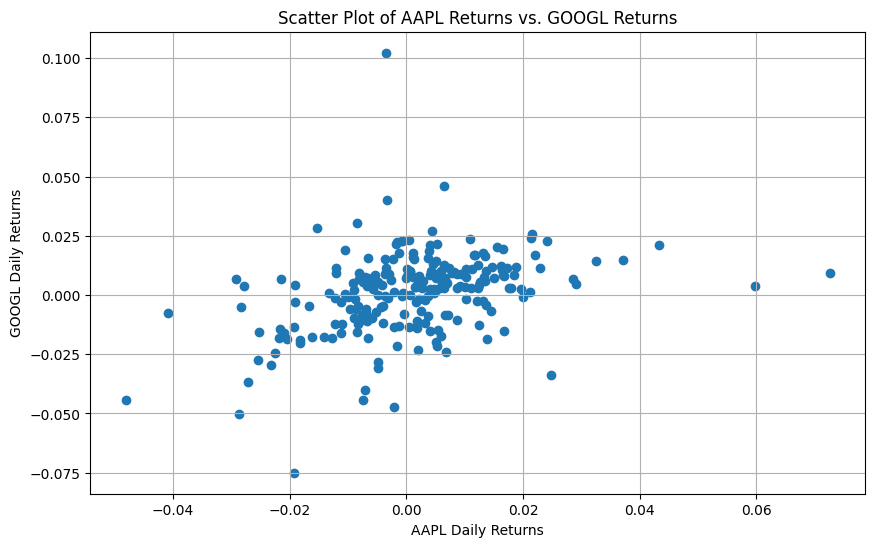

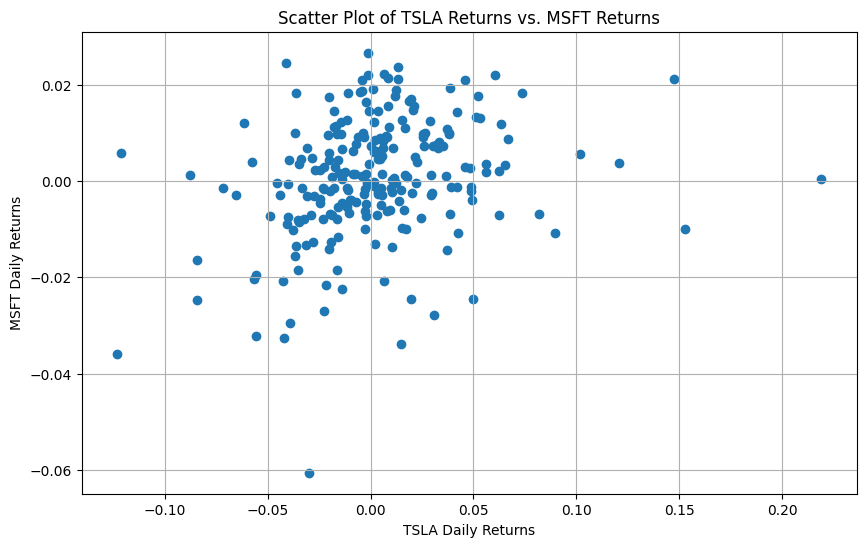

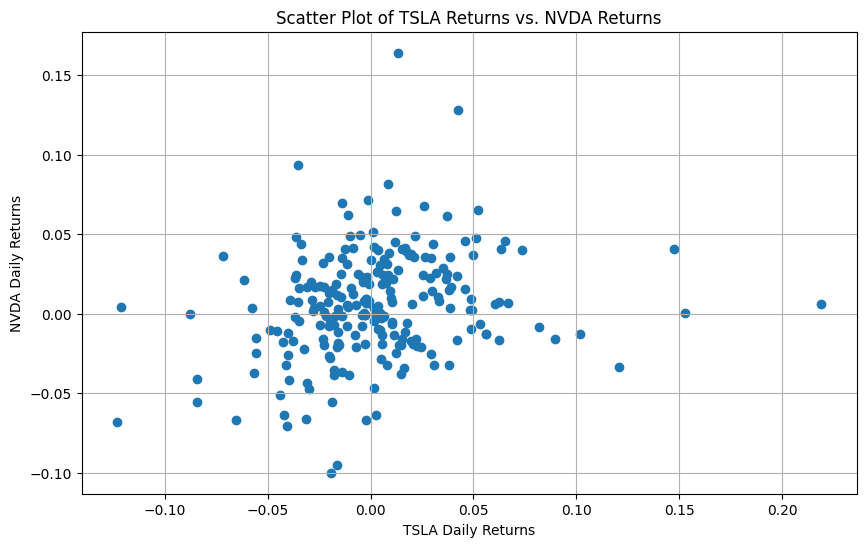

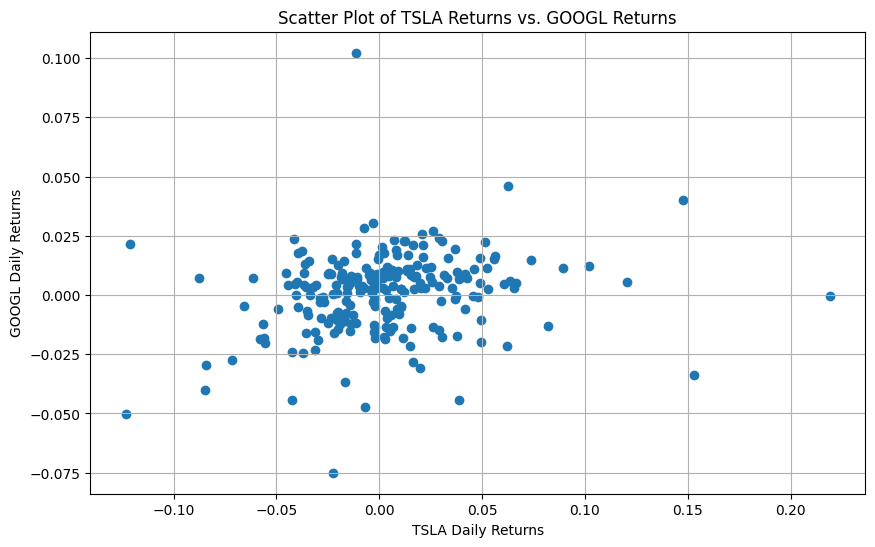

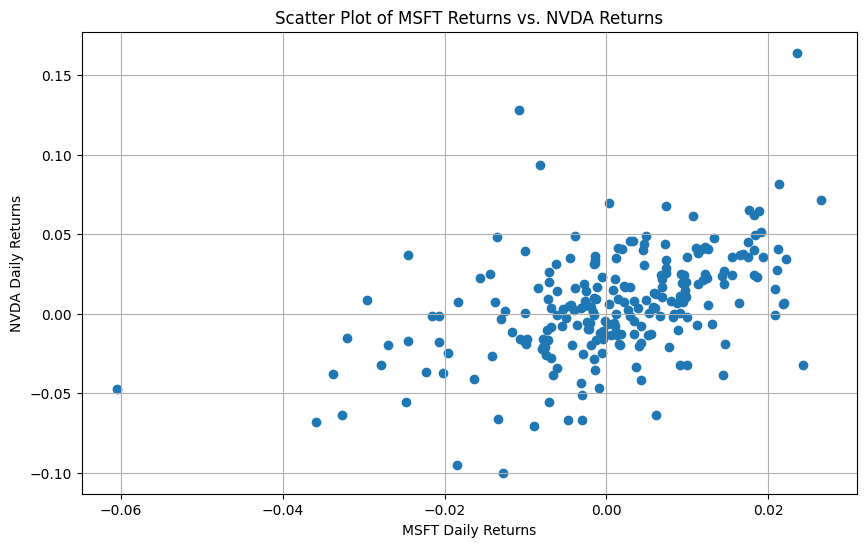

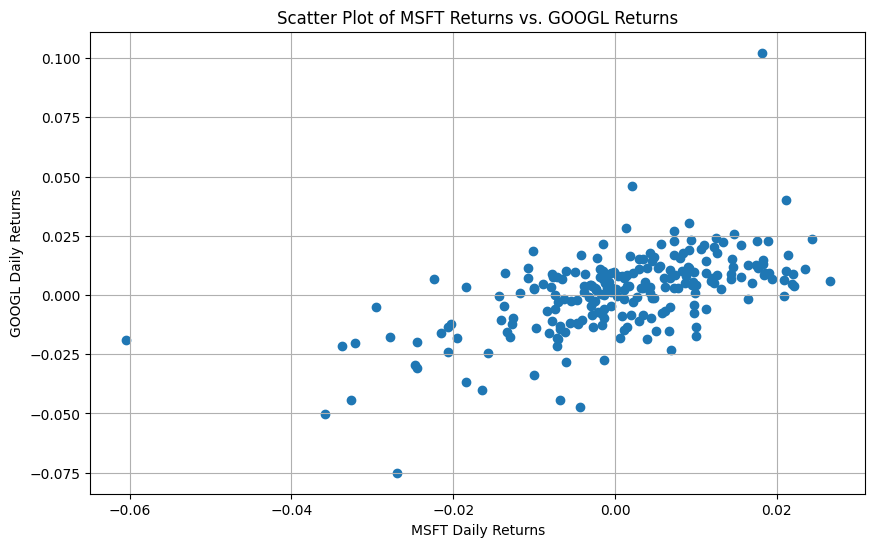

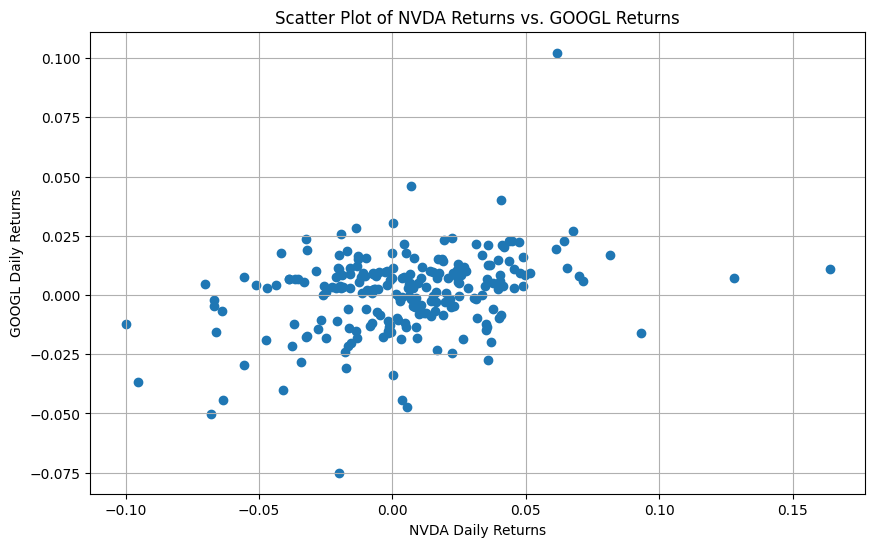

In [ ]:
# with the copy create scatter plots of return of one stock against another to examine relationships or correlations.
# Function to create scatter plots for all stock pairs
def plot_return_relationships(df):
    stocks = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOGL']
    for i in range(len(stocks)):
        for j in range(i + 1, len(stocks)):
            stock1 = stocks[i]
            stock2 = stocks[j]
            plt.figure(figsize=(10, 6))
            plt.scatter(df[f'{stock1}_returns'], df[f'{stock2}_returns'])
            plt.xlabel(f'{stock1} Daily Returns')
            plt.ylabel(f'{stock2} Daily Returns')
            plt.title(f'Scatter Plot of {stock1} Returns vs. {stock2} Returns')
            plt.grid(True)
            plt.show()

# Call the function to generate the plots
plot_return_relationships(df2)

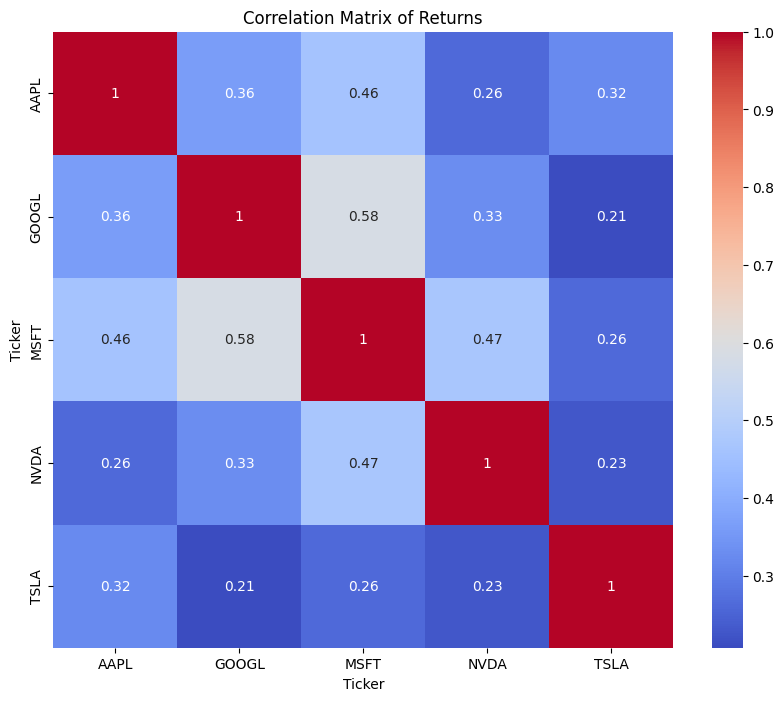

In [ ]:
# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Returns')
plt.show()

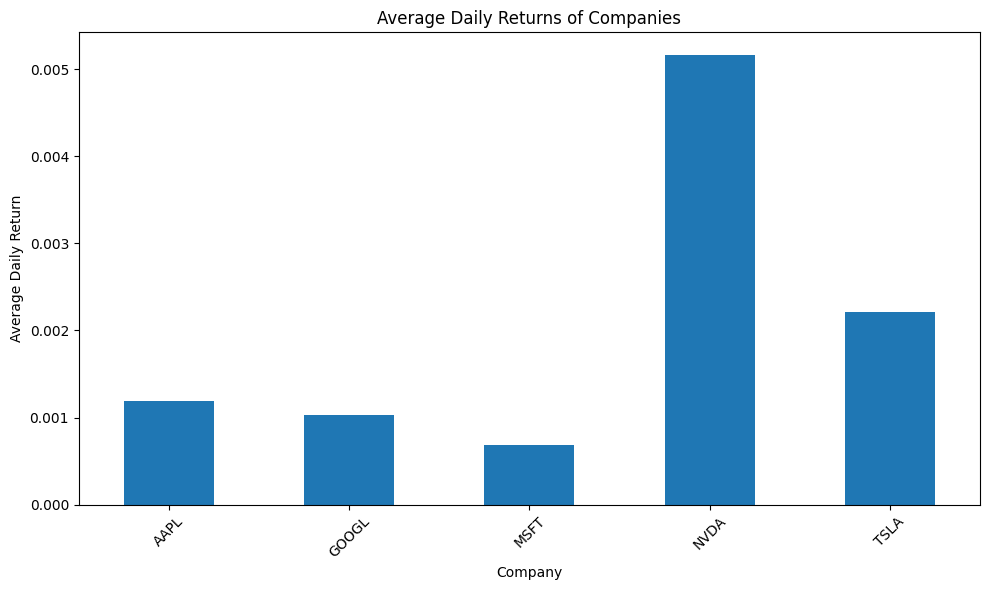

In [ ]:
# Calculate average return for each stock
average_returns = returns.mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
average_returns.plot(kind='bar')
plt.title('Average Daily Returns of Companies')
plt.xlabel('Company')
plt.ylabel('Average Daily Return')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

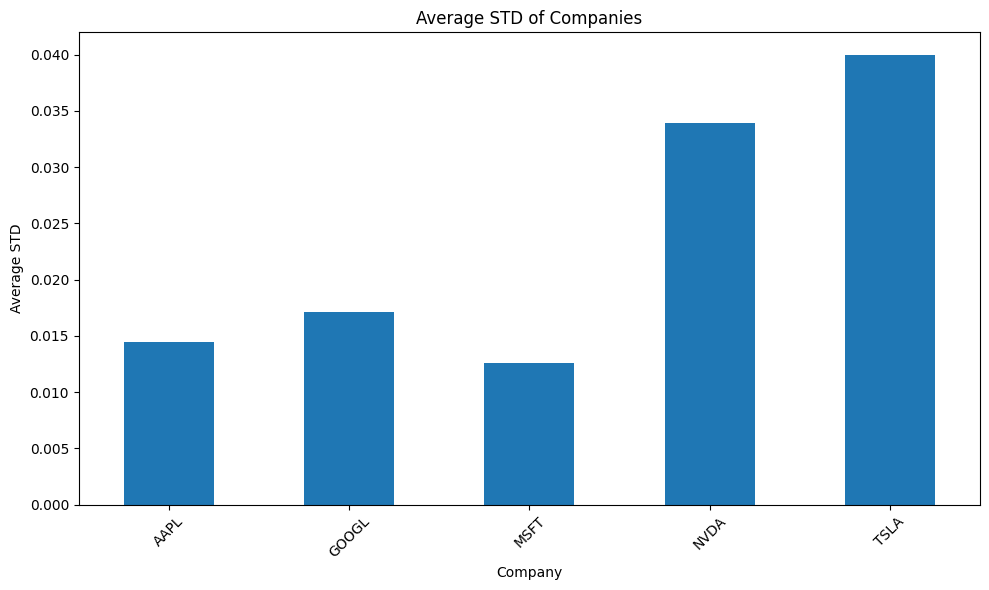

In [ ]:
# Calculate average return for each stock
std_returns = returns.std()

# Create a bar chart
plt.figure(figsize=(10, 6))


std_returns.plot(kind='bar')
plt.title('Average STD of Companies')
plt.xlabel('Company')
plt.ylabel('Average STD')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

**Step 6 - Multivariate Analysis**

<ipython-input-29-1dc88d741793>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(stock, (annualized_std_returns[i], annualized_mean_returns[i]), fontsize=10)


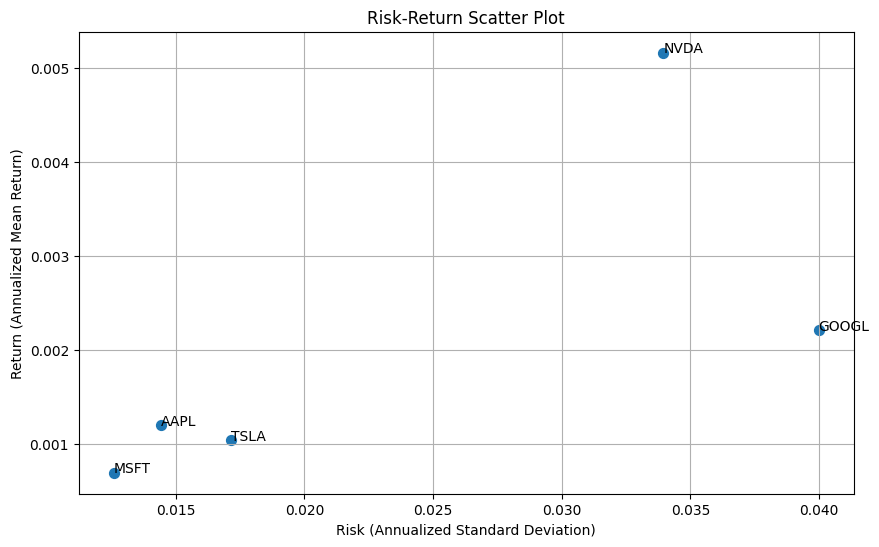

In [ ]:
# Risk-Return Scatter Plot: Visualize each stock with its risk (standard deviation) on the x-axis and return (mean) on the y-axis

# Calculate the mean return and standard deviation for each stock
annualized_mean_returns = returns.mean()
annualized_std_returns = returns.std()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(annualized_std_returns, annualized_mean_returns, s=50)  # s controls marker size

# Add labels and title
plt.xlabel('Risk (Annualized Standard Deviation)')
plt.ylabel('Return (Annualized Mean Return)')
plt.title('Risk-Return Scatter Plot')

# Add stock labels to each point
for i, stock in enumerate(stocks):
    plt.annotate(stock, (annualized_std_returns[i], annualized_mean_returns[i]), fontsize=10)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

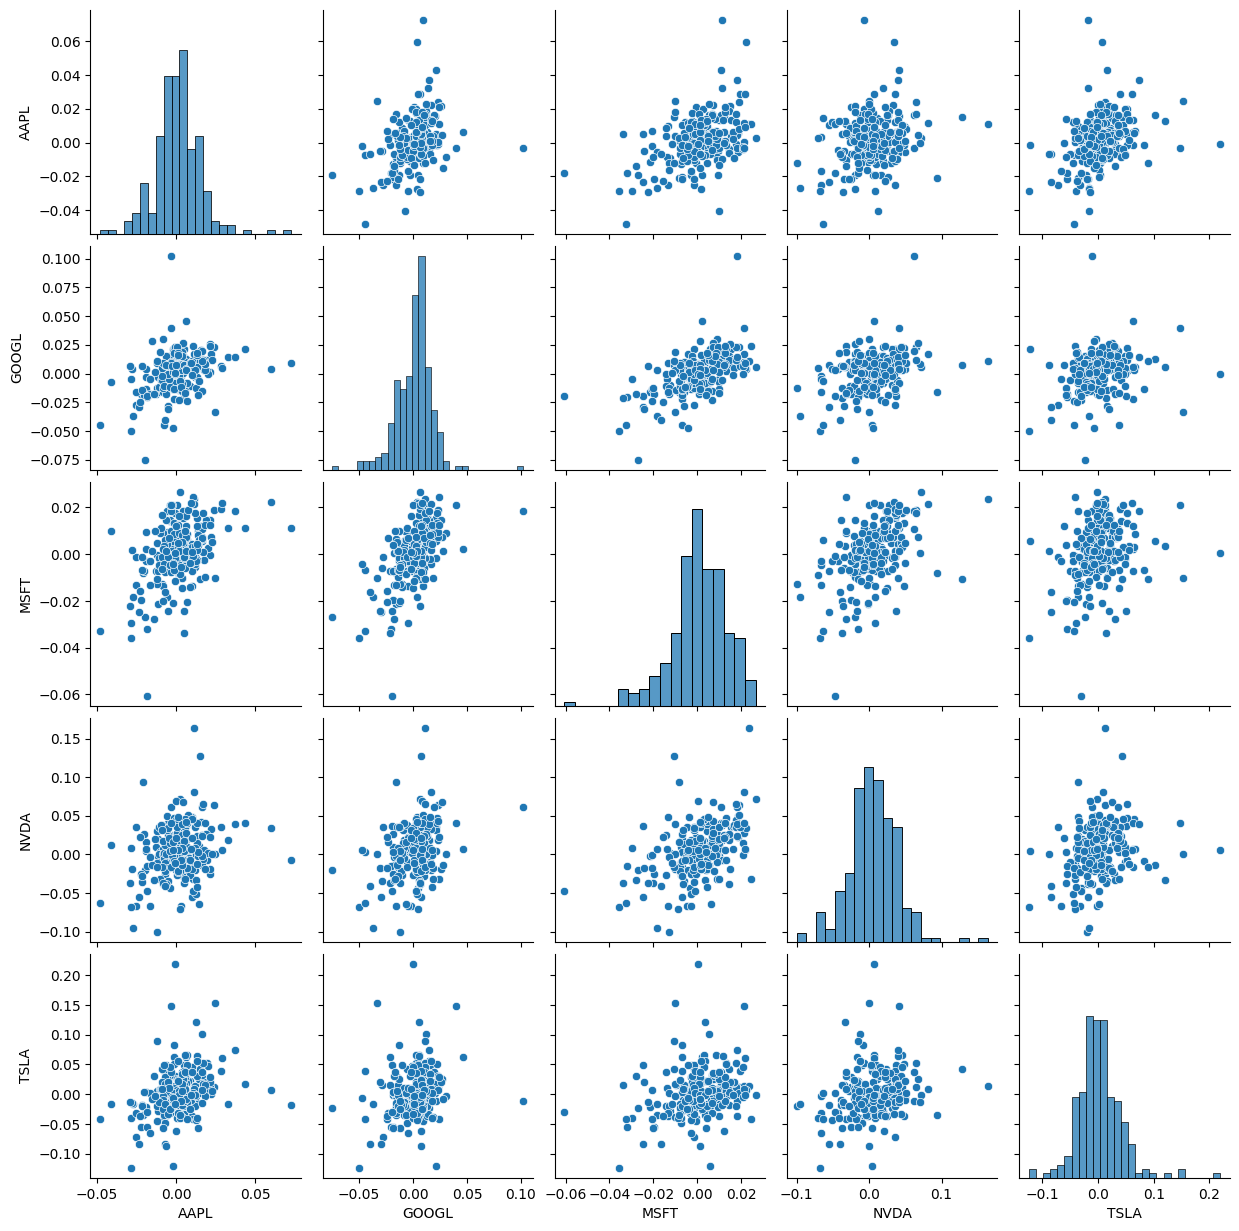

In [ ]:
# pair plot to visualize the relationships among all selected stocks' returns.
# Create the pair plot
sns.pairplot(returns)
plt.show()

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 154MB/s]


In [ ]:
from pyomo.environ import *
import pandas as pd

# Load stock data
stock_data = pd.read_csv('nancy_pelosi_stocks.csv', parse_dates=["Date"], index_col="Date")

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Pyomo Model Initialization
model = ConcreteModel()

# Define decision variables (portfolio weights) with initial values
model.AAPL = Var(domain=NonNegativeReals, bounds=(0, None), initialize=20_000_000)
model.GOOGL = Var(domain=NonNegativeReals, bounds=(0, None), initialize=20_000_000)
model.MSFT = Var(domain=NonNegativeReals, bounds=(0, None), initialize=20_000_000)
model.NVDA = Var(domain=NonNegativeReals, bounds=(0, None), initialize=20_000_000)
model.TSLA = Var(domain=NonNegativeReals, bounds=(0, None), initialize=20_000_000)

# Create a mapping of stocks to variables
stock_vars = {
    'AAPL': model.AAPL,
    'GOOGL': model.GOOGL,
    'MSFT': model.MSFT,
    'NVDA': model.NVDA,
    'TSLA': model.TSLA
}

# Define the objective function (maximize portfolio return)
model.obj = Objective(
    expr=(
        (
            model.AAPL * 0.284705 +
            model.GOOGL * 0.225797 +
            model.MSFT * 0.150340 +
            model.NVDA * 1.870779 +
            model.TSLA * 0.389421 - 0.0422
        ) / sqrt(
            model.AAPL**2 * 0.000208 +
            model.GOOGL**2 * 0.000295 +
            model.MSFT**2 * 0.000159 +
            model.NVDA**2 * 0.001153 +
            model.TSLA**2 * 0.001599 +
            2 * (model.AAPL * model.GOOGL * 0.000090) +
            2 * (model.AAPL * model.MSFT * 0.000084) +
            2 * (model.AAPL * model.NVDA * 0.000128) +
            2 * (model.AAPL * model.TSLA * 0.000187) +
            2 * (model.GOOGL * model.MSFT * 0.000126) +
            2 * (model.GOOGL * model.NVDA * 0.000192) +
            2 * (model.GOOGL * model.TSLA * 0.000142) +
            2 * (model.MSFT * model.NVDA * 0.000201) +
            2 * (model.MSFT * model.TSLA * 0.000132) +
            2 * (model.NVDA * model.TSLA * 0.000310) + 1e-6  # Small constant added
        )
    ),
    sense=maximize
)

# Total investment constraint: Total portfolio equals $100 million
model.total_investment = Constraint(
    expr=model.AAPL + model.GOOGL + model.MSFT + model.NVDA + model.TSLA == 100_000_000
)

# Minimum investment constraint: At least $5 million in each stock
model.min_investment = ConstraintList()
model.min_investment.add(model.AAPL >= 5_000_000)
model.min_investment.add(model.GOOGL >= 5_000_000)
model.min_investment.add(model.MSFT >= 5_000_000)
model.min_investment.add(model.NVDA >= 5_000_000)
model.min_investment.add(model.TSLA >= 5_000_000)

# Maximum investment constraint: At most $35 million in each stock
model.max_investment = ConstraintList()
model.max_investment.add(model.AAPL <= 35_000_000)
model.max_investment.add(model.GOOGL <= 35_000_000)
model.max_investment.add(model.MSFT <= 35_000_000)
model.max_investment.add(model.NVDA <= 35_000_000)
model.max_investment.add(model.TSLA <= 35_000_000)

# Solve the model
solver = SolverFactory('ipopt')
solver.options['max_iter'] = 3000  # Set maximum iterations for convergence
results = solver.solve(model)

# Check solver results
print(results.solver.termination_condition)
print(results.solver.status)

# Extract and display optimal weights
optimal_weights = {stock: stock_vars[stock].value for stock in stock_vars.keys()}
optimal_portfolio = pd.DataFrame(optimal_weights.items(), columns=['Stock', 'Weight'])

print("Optimal Portfolio (Percentages):")
print(optimal_portfolio)
print("--------------------------------------------------------------------------")
print("Objective Function Value (Optimal Portfolio Sharpe ratio):", model.obj())

optimal
ok
Optimal Portfolio (Percentages):
   Stock        Weight
0   AAPL  3.500000e+07
1  GOOGL  1.729483e+07
2   MSFT  7.705169e+06
3   NVDA  3.500000e+07
4   TSLA  5.000000e+06
--------------------------------------------------------------------------
Objective Function Value (Optimal Portfolio Sharpe ratio): 48.79057722112942


Percentage of funds to invest per company

- AAPL: 34.99%
- GOOGL: 17.28%
- MSFT: 7.70%
- NVDA: 34.99%
- TSLA: 5.00%


In [ ]:
print("APPL total investment", 100000000*0.3499)
print('---------------------')
print("GOOGL total investment", 100000000*0.1728)
print('---------------------')
print("MSFT total investment", 100000000*0.0770)
print('---------------------')
print("NVDA total investment", 100000000*0.3499)
print('---------------------')
print("TSLA total investment", 100000000*0.05)
print('---------------------')

APPL total investment 34990000.0
---------------------
GOOGL total investment 17280000.0
---------------------
MSFT total investment 7700000.0
---------------------
NVDA total investment 34990000.0
---------------------
TSLA total investment 5000000.0
---------------------


In [ ]:
print("APPL total investment return", (100000000*0.3499)*(1.284705))
print('---------------------')
print("GOOGL total investment return", (100000000*0.1728)*(1.225797))
print('---------------------')
print("MSFT total investment return", (100000000*0.0770)*(1.150340))
print('---------------------')
print("NVDA total investment return", (100000000*0.3499)*(2.870779))
print('---------------------')
print("TSLA total investment return", (100000000*0.05)*(1.389421))
print('---------------------')
print("Total investment return", 44951827.95+21181772.16+8857618.0+100448557.21000001+6947105.0)

APPL total investment return 44951827.95
---------------------
GOOGL total investment return 21181772.16
---------------------
MSFT total investment return 8857618.0
---------------------
NVDA total investment return 100448557.21000001
---------------------
TSLA total investment return 6947105.0
---------------------
Total investment return 182386880.32


In [ ]:
import math
# Get the values of the decision variables
AAPL_value = 0.3499
GOOGL_value = 0.1728
MSFT_value = 0.077
NVDA_value = 0.3499
TSLA_value = 0.05

# Substitute the values into the expression
expression_value = math.sqrt(
    AAPL_value**2 * 0.000208 +
    GOOGL_value**2 * 0.000295 +
    MSFT_value**2 * 0.000159 +
    NVDA_value**2 * 0.001153 +
    TSLA_value**2 * 0.001599 +
    2 * (AAPL_value * GOOGL_value * 0.000090) +
    2 * (AAPL_value * MSFT_value * 0.000084) +
    2 * (AAPL_value * NVDA_value * 0.000128) +
    2 * (AAPL_value * TSLA_value * 0.000187) +
    2 * (GOOGL_value * MSFT_value * 0.000126) +
    2 * (GOOGL_value * NVDA_value * 0.000192) +
    2 * (GOOGL_value * TSLA_value * 0.000142) +
    2 * (MSFT_value * NVDA_value * 0.000201) +
    2 * (MSFT_value * TSLA_value * 0.000132) +
    2 * (NVDA_value * TSLA_value * 0.000310) + 1e-6  # Small constant added
)

# Print the result
print("Standard deviation of the portfolio", expression_value)

Standard deviation of the portfolio 0.016923045714350594
